# Project 2 by Olivia Hogan

## Abstract

Starting off with a model of Mike Trout's homerun, we can see how drag impacts the path of the baseball. The original program did not factor in wind or temperature. These are important factors to be able to accurately represent the path of the ball because wind and temperature affect air density. Air density is defined as $$\rho = \frac{P}{RT}$$ 

with $\rho$ being the air density, $P$ being the air pressure (in pascals), $R$ being the gas constant for air and $T$ being the temperature (in Kelvin). The drag force depends on relative velocity which is the wind velocity subtracted from the velocity. $$v = v_r - v_{wind}$$ 

With these equations we then move into plotting the path using the RK4 method.

Using this method we are able to see that hitting against the wind will shorten the path of the baseball, hitting into the wind will elongate the path, and hitting with a cross wind will vere the baseball to either the right or the left depending on which way the wind is coming. 

## Theoretical Model

The model should represent the path of the baseball after impact. To see this, we use the RK4 differential equations. These equations consist of: 

$$k_1 = hf(y_n,t_n)$$

$$k_2 = hf\left(y_n+\frac{k_1}{2},t_n+\frac{h}{2}\right)$$

$$k_3 = hf\left(y_n+\frac{k_2}{2},t_n+\frac{h}{2}\right)$$

$$k_4 = hf\left(y_n+k_3,t_n+h\right)$$

We define these ODE's to be able to model the baseball in air. For this model we assume the wind speed is constant and in one direction. We also assume temperature and air pressure based on averages from the past. 

## Code

In [26]:
#import ode #if you have ode.py in the same folder as your notebook
 #if you followed Wang's instructions to put your library in site-packages
import numpy as np
import matplotlib.pyplot as plt


    
def RK4(diffeq, y0, t, h):
    """ RK4 method for ODEs:
        Given y0 at t, returns y1 at t+h """
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0
    


In [44]:
g = 9.8 #N/kg

T = 293.15 #Kelvin (68 degrees F)
R = 287.05 #J/kg K
P = 101591.7 #pascals 
rho = P/(R*T)
#rho = 1.2 #kg/m^3


mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.5 #actually depends on speed
m = 0.145 #kg
b2 = 1/2*Cd*rho*A

vmag0mph = 111.1 #mph
thetadeg = 25 #deg
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

vxwind = -5*0.44704 #m/s
#vxwind = 0
vywind = 0
vzwind = 0

x0 = 0
y0 = 0
z0 = 0
vx0 = vmag0*np.cos(theta)
vy0 = vmag0*np.sin(theta)
vz0 = 0

data = np.array([x0,y0,z0,vx0,vy0,vz0])

t = 0
h = 0.01
Nsteps = int(5/h)

traj = np.zeros((Nsteps,4))
traj[0,:] = np.array([t, x0, y0, z0])

def drag(d, tn): 
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
   
    deriv = np.zeros(6)
    deriv[0] = vx
    deriv[1] = vy
    deriv[2] = vz
    vrelx = vx - vxwind
    vrely = vy - vywind
    vrelz = vz - vzwind
    speed = np.sqrt(vrelx**2 + vrely**2 + vrelz**2)
    deriv[3] = -b2*speed*vrelx/m
    deriv[4] = (-b2*speed*vrely - m*g)/m
    deriv[5] = -b2*speed*vrelz/m
    
    return deriv
    

for n in range(0,Nsteps-1):
    
    # update data
    data = RK4(drag, data, t, h)

    #update time
    t = t + h
    
    #store trajectory
    traj[n+1,:] = np.array([t, data[0], data[1], data[2]])
    


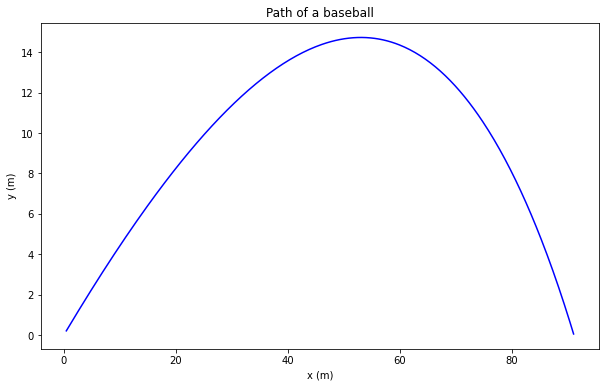

In [46]:
traj2 = traj[traj[:,2]>0]

plt.figure(figsize=(10,6))
plt.title("Path of a baseball")
plt.plot(traj2[:,1], traj2[:,2], 'b-')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## Validation

I validated this program by eliminating the wind factor by setting it to 0 and seeing how to changed the path. I further validated it by setting the wind to the positive x-direction so it would be like hitting with the wind. The results were as expected. 

The results for eliminating the wind were as followed.

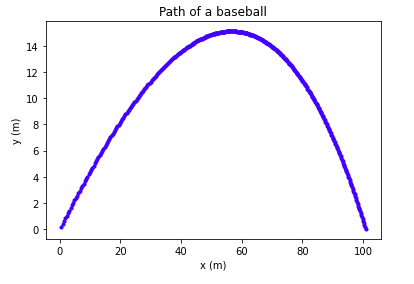

You can see that the baseball was able to travel a bit further than it traveled hitting into the wind. 


The results for hitting the baseball with the wind were as followed. 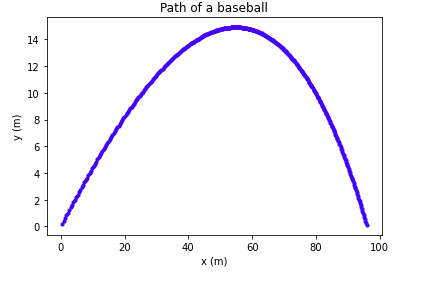 

As you can see the baseball traveled even further with the wind which is expected due to the wind carrying it further along the path.

Adding in a cross wind and looking at the graph from a birds eye view gives us this: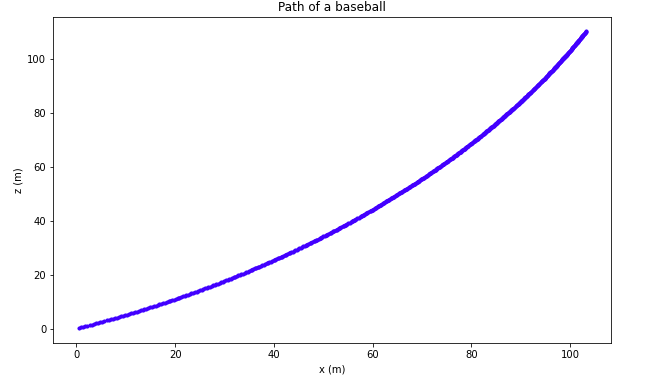

Which is expected because it is moving the baseball to the left instead of having it go down a straight path

## Conclusion

By adding in factors such as wind, air pressure, temperature and air density we were able to get a more accurate view of the path of the baseball. The wind impacts the baseball by pushing it further when the batter is hitting into the wind (+x direction), stopping it sooner when the batter is hitting against the wind (-x direction), and swaying the ball either left or right when there is a cross wind (-/+ y direction). 

The wind variable we were using was small, only $5mph$ but with that it was able to affect the baseball. The results were validated by eliminating the wind factor all together to see where the baseball would land with no wind and they were as expected. 

## References

I took code from 02-01-AirRestistence http://localhost:8888/notebooks/Documents/PHY2200/02-01-air-resistance-oliviahogan/02-01-air-resistance.ipynb


As well as from 02-02 MagnusEffect http://localhost:8888/notebooks/Documents/PHY2200/02-02-magnus-effect-oliviahogan/02-02-magnus-effect.ipynb


I got air density from https://www.brisbanehotairballooning.com.au/calculate-air-density/


I got air pressure stats from https://tides4fishing.com/us/california/los-angeles/forecast/atmospheric-pressure


I got average wind speeds from https://weatherspark.com/y/1705/Average-Weather-in-Los-Angeles-California-United-States-Year-Round
